# Topic Description

This dataset reflects reported incidents of crime that occurred in the City of Chicago from 2014 to 2017. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.

# Goal of the Project

1. The Goal of the project is to identify whether the rate of crimes in chicago is increasing or decreasing over the years and what type of crimes are been taking place the most eg. drugs/narchotics violation or sex offenses, etc. 
2. The goal is to see at which places most of the crimes takes place for eg. apartments, office, roads etc and at what time of the day it takes place like whether majority of the incidents takes place at night or during day time. 
3. We can map the locations of the incidents to show heat maps for the highest or lowest no. of crimes taking place in the area.

# Target Audience

The target audience for this project is the local public of chicago who would be shifting from one area to another or the tourist who would be travelling to chicago for vaction or the international students who would come to chicago for the higher education and also to the chicago police department to see which ward has highest crimes so that they could increase their force in that area.

# Read CSV

In [1]:
import pandas as pd

df= pd.read_csv("/Users/sanket/Downloads/Chicago_Crime.csv")

In [2]:
df.shape

(1048575, 23)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
Unnamed: 0              1048575 non-null int64
ID                      1048575 non-null int64
Case Number             1048575 non-null object
Date                    1048575 non-null object
Block                   1048575 non-null object
IUCR                    1048575 non-null object
Primary Type            1048575 non-null object
Description             1048575 non-null object
Location Description    1046379 non-null object
Arrest                  1048575 non-null bool
Domestic                1048575 non-null bool
Beat                    1048575 non-null int64
District                1048575 non-null int64
Ward                    1048570 non-null float64
Community Area          1048575 non-null int64
FBI Code                1048575 non-null object
X Coordinate            1012620 non-null float64
Y Coordinate            1012620 non-null float64
Year                    10485

In [4]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,411,10508593,HZ250410,05-03-2016 21:00,042XX W MADISON ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,...,28.0,26,18,1148220.0,1899677.0,2016,05-10-2016 15:56,41.880658,-87.731212,"(41.880658176, -87.731212135)"
1,433,10508594,HZ250385,05-03-2016 21:35,065XX S KEDVALE AVE,810,THEFT,OVER $500,APARTMENT,False,...,13.0,65,6,1149830.0,1860872.0,2016,05-10-2016 15:56,41.774141,-87.726307,"(41.77414081, -87.726307093)"
2,539,10508595,HZ250362,05-03-2016 14:45,045XX S DAMEN AVE,560,ASSAULT,SIMPLE,STREET,False,...,12.0,61,08A,1163662.0,1874660.0,2016,05-10-2016 15:56,41.811698,-87.675214,"(41.811697721, -87.675214316)"
3,624,10508597,HZ250202,05-03-2016 18:42,063XX S CLAREMONT AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,15.0,66,08B,1161829.0,1862607.0,2016,05-10-2016 15:56,41.778661,-87.682273,"(41.778661058, -87.68227253)"
4,690,10508598,HZ250298,05-03-2016 15:00,070XX S INDIANA AVE,320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,6.0,69,3,1178808.0,1858478.0,2016,05-10-2016 15:56,41.766961,-87.620152,"(41.766961034, -87.620152116)"


# Data Cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In this step we have removed few columns which are not useful and by that we mean, we cannot build any inference out of those columns.

1. Unnamed was a blank column.
2. Case Number column has all the case number in integers.
3. Block has address and has a value 'xxxxxx' due to privacy issues.
4. IUCR also has numbers which is the Illinois Uniform Crime Reporting code and is a combination of Primary Type and Description.
5. Domestic indicates whether the crime was domestic as categorized by the Illinois Domestic Violence Act but when checked manually the categorization was different for same values.
6. FBI Code is a code which is marked for the internal purpose of the FBI.
7. X Coordinate and Y Coordinate has are dropped because we have a combined column which gives the exact location of the crime.
8. Updated On is the column contains the date at which the crime status was updated.

In [6]:
df=df.drop(['Unnamed: 0','Case Number','Block','IUCR','Domestic','FBI Code','X Coordinate','Y Coordinate','Updated On'],axis=1)

In [7]:
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Location
0,10508593,05-03-2016 21:00,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,1115,11,28.0,26,2016,41.880658,-87.731212,"(41.880658176, -87.731212135)"
1,10508594,05-03-2016 21:35,THEFT,OVER $500,APARTMENT,False,833,8,13.0,65,2016,41.774141,-87.726307,"(41.77414081, -87.726307093)"
2,10508595,05-03-2016 14:45,ASSAULT,SIMPLE,STREET,False,924,9,12.0,61,2016,41.811698,-87.675214,"(41.811697721, -87.675214316)"
3,10508597,05-03-2016 18:42,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,825,8,15.0,66,2016,41.778661,-87.682273,"(41.778661058, -87.68227253)"
4,10508598,05-03-2016 15:00,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,322,3,6.0,69,2016,41.766961,-87.620152,"(41.766961034, -87.620152116)"


We have Renamed columns in order to make it in a standard format and thus becomes easier to acces any column while performing any operation on it.

In [8]:
df.rename(columns={'ID':'unique_id',
                          'Date':'date',
                          'Primary Type':'primary_type',
                          'Description':'description',
                          'Location Description':'loc_desc',
                          'Arrest':'arrest',
                          'Domestic':'domestic',
                          'Beat':'beat',
                          'District':'district',
                          'Ward':'ward',
                          'Community Area':'community_area',
                          'Year':'year',
                          'Latitude':'latitude',
                          'Longitude':'longitude',
                          'Location':'location'}, 
                             inplace=True)

In [9]:
df.columns

Index(['unique_id', 'date', 'primary_type', 'description', 'loc_desc',
       'arrest', 'beat', 'district', 'ward', 'community_area', 'year',
       'latitude', 'longitude', 'location'],
      dtype='object')

# Column Description

1.  unique_id :- Unique identifier for the record.
2.  date :- Date when the incident occurred. this is sometimes a best estimate.
3.  primary_type :- The primary description of the IUCR code.
4.  description :- The secondary description of the IUCR code, a subcategory of the primary description.
5.  loc_desc :- Description of the location where the incident occurred.
6.  arrest :- Indicates whether an arrest was made.
7.  beat :- Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts.
8.  district :- Indicates the police district where the incident occurred.
9.  ward :- The ward (City Council district) where the incident occurred.
10. community_area :- Indicates the community area where the incident occurred. Chicago has 77 community areas.
11. year :- Year the incident occurred.
12. latitude :- The latitude of the location where the incident occurred.
13. longitude :- The longitude of the location where the incident occurred. 
14. location :- The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal.

# Calculate and remove missing values

In [10]:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
unique_id             0
date                  0
primary_type          0
description           0
loc_desc           2196
arrest                0
beat                  0
district              0
ward                  5
community_area        0
year                  0
latitude          35955
longitude         35955
location          35955
dtype: int64


We have now dropped the latitude, longitude and the location as we are planning to plot crime location on the Map. If any of these columns has missing values then we won't be able to map that crime which does not have any location against it and our whole analysis will be done incorrectly.

In [11]:
df.dropna(subset=['latitude','longitude','location'], how='all', inplace = True)

In [12]:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
unique_id            0
date                 0
primary_type         0
description          0
loc_desc          1441
arrest               0
beat                 0
district             0
ward                 5
community_area       0
year                 0
latitude             0
longitude            0
location             0
dtype: int64


In this step we have now filled the Location Description as Others. There are two main reasons for that:
1. The location description column already had value Others in it.
2. It is difficult to predict where the exact crime has been taken place.

In [13]:
df["loc_desc"].fillna("Others", inplace = True)

In [14]:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
unique_id         0
date              0
primary_type      0
description       0
loc_desc          0
arrest            0
beat              0
district          0
ward              5
community_area    0
year              0
latitude          0
longitude         0
location          0
dtype: int64


In the below steps, we have converted the strings into lower case so as to maintain consistency.

In [15]:
df['primary_type']=df['primary_type'].str.lower()


In [16]:
df['loc_desc']=df['loc_desc'].str.lower()

# Reformatting Date Column

Now let's have a look at the Date column which has different format. We have applied 'to_datetime' method which will convert each date into one single format. 

One major reason is, post converting it into datetime format we can access the date and time individually which let us plot the time series graphs in the future which is also one of the most important visualisation for our Dataset.

In [17]:
df['date'].unique()

array(['05-03-2016 21:00', '05-03-2016 21:35', '05-03-2016 14:45', ...,
       '11/28/2017 08:08:00 PM', '11/28/2017 09:30:00 PM',
       '11/28/2017 09:11:00 PM'], dtype=object)

In [18]:
#Done
#This will convert the value of service_start_date to (YYYY-MM-DD) and removes the timestamp from it if any.
df['Date1'] = pd.to_datetime(df['date'], dayfirst=True).dt.round('30min')

df['new_date'] = [d.date() for d in df['Date1']]
df['new_time'] = [d.time() for d in df['Date1']]

In [19]:
df['new_date'].unique()

array([datetime.date(2016, 3, 5), datetime.date(2016, 3, 6),
       datetime.date(2016, 4, 5), ..., datetime.date(2017, 11, 26),
       datetime.date(2017, 11, 27), datetime.date(2017, 11, 28)],
      dtype=object)

In [20]:
df['new_time'].unique()

array([datetime.time(21, 0), datetime.time(21, 30), datetime.time(15, 0),
       datetime.time(18, 30), datetime.time(22, 0), datetime.time(15, 30),
       datetime.time(20, 30), datetime.time(9, 30), datetime.time(22, 30),
       datetime.time(7, 30), datetime.time(17, 30), datetime.time(13, 30),
       datetime.time(23, 30), datetime.time(23, 0), datetime.time(10, 0),
       datetime.time(19, 0), datetime.time(20, 0), datetime.time(17, 0),
       datetime.time(0, 0), datetime.time(8, 0), datetime.time(16, 0),
       datetime.time(9, 0), datetime.time(7, 0), datetime.time(14, 30),
       datetime.time(19, 30), datetime.time(6, 30), datetime.time(1, 30),
       datetime.time(11, 0), datetime.time(13, 0), datetime.time(11, 30),
       datetime.time(14, 0), datetime.time(0, 30), datetime.time(12, 0),
       datetime.time(8, 30), datetime.time(5, 0), datetime.time(18, 0),
       datetime.time(12, 30), datetime.time(16, 30), datetime.time(2, 0),
       datetime.time(1, 0), datetime.time(6,

# Categorizing the data

The main reason behind categorizing is to split multiple values into groups. 

Some categories might have very low frequencies and its generally a good idea to combine them. 

In [21]:
def f(x):
  if x['primary_type'] == 'narcotics' or x['primary_type'] == 'theft' or x['primary_type'] == 'assault' or x['primary_type'] == 'robbery' or x['primary_type'] == 'criminal damage' or x['primary_type'] == 'weapons violation' or x['primary_type'] == 'human tracfficking' or x['primary_type'] == 'stalking' : return 'Violence'
  else: return 'Non-Violence'

%time df['crime_categories'] = df.apply(f, axis=1)

CPU times: user 46.1 s, sys: 435 ms, total: 46.6 s
Wall time: 46.7 s


In [22]:
def f(x):
    if   x['loc_desc'] == 'sidewalk' or x['loc_desc'] == 'street' or x['loc_desc'] == 'alley' or x['loc_desc'] == 'highway/expressway' or x['loc_desc'] == 'expressway embankment' or x['loc_desc'] == 'cha hallway/stairwell/elevator' or x['loc_desc'] == 'bowling alley' or x['loc_desc'] == 'hallway' or x['loc_desc'] == 'stairwell' or x['loc_desc'] == 'vestibule' or x['loc_desc'] == 'driveway' or x['loc_desc'] == 'elevator' or x['loc_desc'] == 'gangway' : return 'Pathways'
    elif x['loc_desc'] == 'apartment' or x['loc_desc'] == 'cha apartment' or x['loc_desc'] == 'residence' or x['loc_desc'] == 'residence porch/hallway' or x['loc_desc'] == 'residential yard (front/back)' or x['loc_desc'] == 'yard'  or x['loc_desc'] == 'residence-garage' or x['loc_desc'] == 'garage' or x['loc_desc'] == 'driveway - residential' or x['loc_desc'] == 'abandoned building' or x['loc_desc'] == 'nursing home/retirement home' or x['loc_desc'] == 'nursing home' or x['loc_desc'] == 'rooming house' : return 'Residential Places'
    elif x['loc_desc'] == 'police facility/veh parking lot' or x['loc_desc'] == 'cha parking lot/grounds' or x['loc_desc'] == 'parking lot' or x['loc_desc'] == 'parking lot/garage(non.resid.)' or x['loc_desc'] == 'cha parking lot' : return 'Parking Lots'
    elif x['loc_desc'] == 'bar or tavern' or x['loc_desc'] == 'club' or x['loc_desc'] == 'tavern' : return 'Club,Bar and Tavern'
    elif x['loc_desc'] == 'cta train' or x['loc_desc'] == 'cta platform'  or x['loc_desc'] == 'cta bus' or x['loc_desc'] == 'cta station' or x['loc_desc'] == 'cta garage / other property' or x['loc_desc'] == 'cta bus stop' or x['loc_desc'] == 'cta tracks - right of way' or x['loc_desc'] == 'cta "l" platform' or x['loc_desc'] == 'cta property' : return 'Chicago Transit Authority'
    elif x['loc_desc'] == 'vehicle non-commercial' or x['loc_desc'] == 'other commercial transportation' or x['loc_desc'] == 'vehicle-commercial' or x['loc_desc'] == 'vehicle - delivery truck' or x['loc_desc'] == 'truck' or x['loc_desc'] == 'delivery truck' or x['loc_desc'] == 'vehicle - other ride service' : return 'Vehicle Services'
    elif x['loc_desc'] == 'school, public, grounds' or x['loc_desc'] == 'park property' or x['loc_desc'] == 'vacant lot/land' or x['loc_desc'] == 'vacant lot' or x['loc_desc'] == 'factory/manufacturing building'or x['loc_desc'] == 'warehouse' or x['loc_desc'] == 'construction site' or x['loc_desc'] == 'college/university grounds' or x['loc_desc'] == 'school, public, building' or x['loc_desc'] == 'school, private, grounds' or x['loc_desc'] == 'college/university residence hall' or x['loc_desc'] == 'school, private, building' or x['loc_desc'] == 'school yard': return 'Schools and Buildings (Public and private Areas)'
    elif x['loc_desc'] == 'medical/dental office' or x['loc_desc'] == 'commercial / business office' or x['loc_desc'] == 'office' : return 'Commercial and other Offices'
    elif x['loc_desc'] == 'hospital building/grounds' or x['loc_desc'] == 'animal hospital' or x['loc_desc'] == 'hospital' : return 'Hospitals'
    elif x['loc_desc'] == 'small retail store' or x['loc_desc'] == 'drug store' or x['loc_desc'] == 'grocery food store' or x['loc_desc'] == 'convenience store' or x['loc_desc'] == 'tavern/liquor store' or x['loc_desc'] == 'department store' or x['loc_desc'] == 'pawn shop' or x['loc_desc'] == 'appliance store' or x['loc_desc'] == 'cleaning store' or x['loc_desc'] == 'retail store' or x['loc_desc'] == 'liquor store' : return 'Various Stores'
    elif x['loc_desc'] == 'restaurant' or x['loc_desc'] == 'hotel/motel' : return 'Restaurant'
    elif x['loc_desc'] == 'bank' or x['loc_desc'] == 'credit union' or x['loc_desc'] == 'savings and loan'  : return 'Bank'
    elif x['loc_desc'] == 'sports arena/stadium' or x['loc_desc'] == 'athletic club' : return 'Sport Clubs'
    elif x['loc_desc'] == 'airport/aircraft' or x['loc_desc'] == 'airport terminal lower level - non-secure area' or x['loc_desc'] == 'airport terminal upper level - non-secure area' or x['loc_desc'] == 'airport exterior - non-secure area' or x['loc_desc'] == 'airport building non-terminal - non-secure area' or x['loc_desc'] == 'airport building non-terminal - secure area' or x['loc_desc'] == 'airport parking lot' or x['loc_desc'] == 'airport vending establishment' or x['loc_desc'] == 'airport terminal mezzanine - non-secure area' or x['loc_desc'] == 'airport terminal lower level - secure area' or x['loc_desc'] == 'airport exterior - secure area' or x['loc_desc'] == 'airport terminal upper level - non-secure area' or x['loc_desc'] == 'airport transportation system (ats)' : return 'Airport'
    elif x['loc_desc'] == 'gas station' or x['loc_desc'] == 'fire station' or x['loc_desc'] == 'gas station drive/prop.' : return 'Gas and Fire Stations'
    elif x['loc_desc'] == 'government building' or x['loc_desc'] == 'government building/property' or x['loc_desc'] == 'river bank' or x['loc_desc'] == 'other railroad prop / train depot' or x['loc_desc'] == 'lakefront/waterfront/riverbank' or x['loc_desc'] == 'jail / lock-up facility' or x['loc_desc'] == 'forest preserve' or x['loc_desc'] == 'church/synagogue/place of worship' or x['loc_desc'] == 'church' or x['loc_desc'] == 'railroad property' : return 'Government Property' 
    elif x['loc_desc'] == 'library' or x['loc_desc'] == 'taxicab' or x['loc_desc'] == 'barbershop' or x['loc_desc'] == 'atm (automatic teller machine)' or x['loc_desc'] == 'currency exchange' or x['loc_desc'] == 'day care center' or x['loc_desc'] == 'movie house/theater' or x['loc_desc'] == 'car wash' or x['loc_desc'] == 'pool room' or x['loc_desc'] == 'poolroom' or x['loc_desc'] == 'auto' or x['loc_desc'] == 'other' or x['loc_desc'] == 'fire station' or x['loc_desc'] == 'boat/watercraft' or x['loc_desc'] == 'barber shop/beauty salon' or x['loc_desc'] == 'cemetary' or x['loc_desc'] == 'newsstand' or x['loc_desc'] == 'cleaners/laundromat' or x['loc_desc'] == 'coin operated machine' or x['loc_desc'] == 'basement' or x['loc_desc'] == 'laundry room' or x['loc_desc'] == 'lagoon' or x['loc_desc'] == 'auto / boat / rv dealership' : return 'Others'
    
%time df['loc_categories'] = df.apply(f, axis=1)

CPU times: user 3min 20s, sys: 844 ms, total: 3min 21s
Wall time: 3min 22s


# Performance Optimization

1. The one main issue we faced during data cleaning was performance issue and the major reason was that our code consists of if-else conditions while categorizing the values.

2. To overcome this we have made use of the Dictionary which turned out to be most powerful tool to replace values for which a match is found. 

3. This in turn helped to reduce the execution time considerably from 14 minutes to 649 milliseconds. 

4. This was a major finding and learning for us during cleaning.

In [23]:
example_dict = {'narcotics':'Violence','theft':'Violence','robbery':'Violence','human trafficking':'Violence','assault':'Violence','weapons violation':'Violence', 'criminal damage':'Violence', 'stalking':'Violence',
               'deceptive practice':'Non-Violence','liquor law violation':'Non-Violence','prostitution':'Non-Violence','gambling':'Non-Violence','interference with public officer':'Non-Violence',
                'offense involving children':'Non-Violence','homicide':'Non-Violence','intimidation':'Non-Violence','concealed carry license violation':'Non-Violence','kidnapping':'Non-Violence','battery':'Non-Violence',
                'public peace violation':'Non-Violence','criminal trespass':'Non-Violence','stalking':'Non-Violence','criminal damage':'Non-Violence','arson':'Non-Violence','public indecency':'Non-Violence',
                'sex offense':'Non-Violence','crim sexual assault':'Non-Violence','burglary':'Non-Violence',
                'motor vehicle theft':'Non-Violence',
                'narcotics':'Non-Violence','other narcotic violation':'Non-Violence',
                'other offense':'Non-Violence','non - criminal':'Non-Violence','non-criminal (subject specified)':'Non-Violence','obscenity':'Non-Violence','non-criminal':'Non-Violence'}

%time df['crime_categories'] = df['primary_type'].apply(lambda value: example_dict[value])


CPU times: user 321 ms, sys: 6.87 ms, total: 328 ms
Wall time: 336 ms


In [24]:
example_dict = {'sidewalk':'Pathways','street':'Pathways','alley':'Pathways','highway/expressway':'Pathways','expressway embankment':'Pathways','cha hallway/stairwell/elevator':'Pathways','bowling alley':'Pathways','hallway':'Pathways','stairwell':'Pathways','vestibule':'Pathways','driveway':'Pathways','elevator':'Pathways','gangway':'Pathways','bridge':'Pathways',
                'apartment':'Residential Places','cha apartment':'Residential Places','residence':'Residential Places','residence porch/hallway':'Residential Places','residential yard (front/back)':'Residential Places','yard':'Residential Places','residence-garage':'Residential Places','garage':'Residential Places','driveway - residential':'Residential Places','abandoned building':'Residential Places','nursing home/retirement home':'Residential Places','nursing home':'Residential Places','rooming house':'Residential Places','house':'Residential Places','federal building':'Residential Places','porch':'Residential Places',
                'police facility/veh parking lot':'Parking Lots','cha parking lot/grounds':'Parking Lots','parking lot':'Parking Lots','parking lot/garage(non.resid.)':'Parking Lots','cha parking lot':'Parking Lots',
                'bar or tavern':'Club,Bar and Tavern','club':'Club,Bar and Tavern','tavern':'Club,Bar and Tavern',
                'cta train':'Chicago Transit Authority','cta platform':'Chicago Transit Authority','cta bus':'Chicago Transit Authority','cta station':'Chicago Transit Authority','cta garage / other property':'Chicago Transit Authority','cta bus stop':'Chicago Transit Authority','cta tracks - right of way':'Chicago Transit Authority','cta "l" platform':'Chicago Transit Authority','cta property':'Chicago Transit Authority','cta "l" train':'Chicago Transit Authority','cha hallway':'Chicago Transit Authority',
                'vehicle non-commercial':'Vehicle Services','other commercial transportation':'Vehicle Services','vehicle-commercial':'Vehicle Services','vehicle - delivery truck':'Vehicle Services','truck':'Vehicle Services','delivery truck':'Vehicle Services','vehicle - other ride service':'Vehicle Services',
                'school, public, grounds':'Schools and Buildings (Public and private Areas)','park property':'Schools and Buildings (Public and private Areas)','vacant lot/land':'Schools and Buildings (Public and private Areas)','vacant lot':'Schools and Buildings (Public and private Areas)','factory/manufacturing building':'Schools and Buildings (Public and private Areas)','warehouse':'Schools and Buildings (Public and private Areas)','construction site':'Schools and Buildings (Public and private Areas)','college/university grounds':'Schools and Buildings (Public and private Areas)','school, public, building':'Schools and Buildings (Public and private Areas)','school, private, grounds':'Schools and Buildings (Public and private Areas)','college/university residence hall':'Schools and Buildings (Public and private Areas)','school, private, building':'Schools and Buildings (Public and private Areas)','school yard':'Schools and Buildings (Public and private Areas)',
                'restaurant':'Hotel/Motel and Restaurant','hotel/motel':'Hotel/Motel and Restaurant','hotel':'Hotel/Motel and Restaurant',
                'bank':'Bank','credit union':'Bank','savings and loan':'Bank',
                'medical/dental office':'Commercial and other Offices','commercial / business office':'Commercial and other Offices','office':'Commercial and other Offices',
                'hospital building/grounds':'Hospitals','animal hospital':'Hospitals', 'hospital':'Hospitals',
                'small retail store':'Various Stores','drug store':'Various Stores','grocery food store':'Various Stores','convenience store':'Various Stores','tavern/liquor store':'Various Stores','department store':'Various Stores','pawn shop':'Various Stores','appliance store':'Various Stores','cleaning store':'Various Stores','retail store':'Various Stores','liquor store':'Various Stores',
                'sports arena/stadium':'Sport Clubs','athletic club':'Sport Clubs',
                'airport/aircraft':'Airport','airport terminal lower level - non-secure area':'Airport','airport terminal upper level - non-secure area':'Airport','airport exterior - non-secure area':'Airport','airport building non-terminal - non-secure area':'Airport','airport building non-terminal - secure area':'Airport','airport parking lot':'Airport','airport vending establishment':'Airport','airport terminal mezzanine - non-secure area':'Airport','airport terminal lower level - secure area':'Airport','airport exterior - secure area':'Airport','airport terminal upper level - non-secure area':'Airport','airport transportation system (ats)':'Airport','airport terminal upper level - secure area':'Airport','aircraft':'Airport',
                'gas station':'Gas and Fire Stations','fire station':'Gas and Fire Stations','gas station drive/prop.': 'Gas and Fire Stations',
                'government building':'Government Property','government building/property':'Government Property','river bank':'Government Property','other railroad prop / train depot':'Government Property','lakefront/waterfront/riverbank':'Government Property','jail / lock-up facility':'Government Property','forest preserve':'Government Property','church/synagogue/place of worship':'Government Property','church':'Government Property','railroad property':'Government Property',
                'library':'Others','taxicab':'Others','barbershop':'Others','atm (automatic teller machine)':'Others','currency exchange':'Others','day care center':'Others','movie house/theater':'Others','car wash':'Others','pool room':'Others','poolroom':'Others','auto':'Others','other':'Others','fire station':'Others','boat/watercraft':'Others','barber shop/beauty salon':'Others','cemetary':'Others','newsstand':'Others','cleaners/laundromat':'Others','coin operated machine':'Others','basement':'Others','laundry room':'Others','lagoon':'Others','others':'Others','auto / boat / rv dealership':'Others'}

%time df['loc_categories'] = df['loc_desc'].apply(lambda value: example_dict[value])

CPU times: user 311 ms, sys: 4.25 ms, total: 315 ms
Wall time: 317 ms


In [25]:
example_dict = {'assault':'Serious Offenses','theft':'Serious Offenses','robbery':'Serious Offenses','human trafficking':'Serious Offenses','burglary':'Serious Offenses','weapons violation':'Serious Offenses',
               'deceptive practice':'Less Serious Offenses','liquor law violation':'Less Serious Offenses','prostitution':'Less Serious Offenses','gambling':'Less Serious Offenses','interference with public officer':'Less Serious Offenses',
                'offense involving children':'Violent Crimes','homicide':'Violent Crimes','intimidation':'Violent Crimes','concealed carry license violation':'Violent Crimes','kidnapping':'Violent Crimes','battery':'Violent Crimes',
                'public peace violation':'Public Violence','criminal trespass':'Public Violence','stalking':'Public Violence','criminal damage':'Public Violence','arson':'Public Violence','public indecency':'Public Violence',
                'sex offense':'Criminal Sexual Assault','crim sexual assault':'Criminal Sexual Assault',
                'motor vehicle theft':'Motor Vehicle Theft',
                'narcotics':'Drug/Narcotic Violation','other narcotic violation':'Drug/Narcotic Violation',
                'other offense':'Non-Criminal','non - criminal':'Non-Criminal','non-criminal (subject specified)':'Non-Criminal','obscenity':'Non-Criminal','non-criminal':'Non-Criminal'}

%time df['primary_type_categories'] = df['primary_type'].apply(lambda value: example_dict[value])

CPU times: user 255 ms, sys: 3.36 ms, total: 258 ms
Wall time: 263 ms


In [26]:
df.drop(['date','description','year'], axis=1,inplace=True)

In [27]:
df.head()

,unique_id,primary_type,loc_desc,arrest,beat,district,ward,community_area,latitude,longitude,location,Date1,new_date,new_time,crime_categories,loc_categories,primary_type_categories
0,10508593,narcotics,sidewalk,True,1115,11,28.0,26,41.880658,-87.731212,"(41.880658176, -87.731212135)",2016-03-05 21:00:00,2016-03-05,21:00:00,Non-Violence,Pathways,Drug/Narcotic Violation
1,10508594,theft,apartment,False,833,8,13.0,65,41.774141,-87.726307,"(41.77414081, -87.726307093)",2016-03-05 21:30:00,2016-03-05,21:30:00,Violence,Residential Places,Serious Offenses
2,10508595,assault,street,False,924,9,12.0,61,41.811698,-87.675214,"(41.811697721, -87.675214316)",2016-03-05 15:00:00,2016-03-05,15:00:00,Violence,Pathways,Serious Offenses
3,10508597,battery,sidewalk,False,825,8,15.0,66,41.778661,-87.682273,"(41.778661058, -87.68227253)",2016-03-05 18:30:00,2016-03-05,18:30:00,Non-Violence,Pathways,Violent Crimes
4,10508598,robbery,sidewalk,False,322,3,6.0,69,41.766961,-87.620152,"(41.766961034, -87.620152116)",2016-03-05 15:00:00,2016-03-05,15:00:00,Violence,Pathways,Serious Offenses


# Question 1 - Total no. of Crimes in Chicago?

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

df.groupby('crime_categories')['crime_categories'].size().plot(kind='bar')
plt.show()

<Figure size 640x480 with 1 Axes>

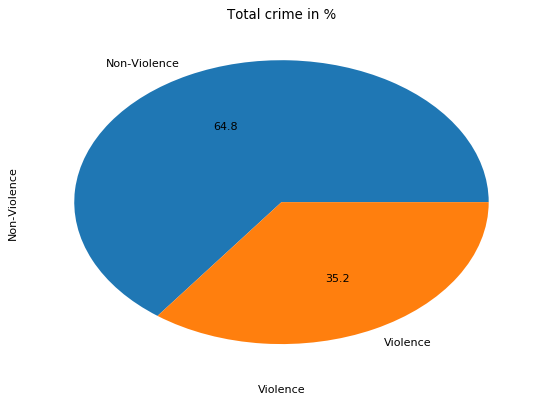

In [29]:
from matplotlib.pyplot import figure
a=df['Date1'].groupby(df['crime_categories']).agg('count')
figure(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
a.plot(kind='pie', autopct='%.1f')
plt.title('Total crime in %')
plt.tight_layout()
plt.xlabel('Violence')
plt.ylabel('Non-Violence')
plt.show()

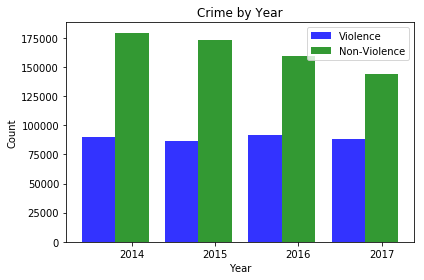

In [30]:
import numpy as np
import matplotlib.pyplot as plt
crime_violence = []
crime_non_violence = []

# data to plot
n_groups = 4

a=df.Date1.dt.year.groupby([df.crime_categories,df.Date1.dt.year]).agg('count')

for x in range(0,len(a)):
    if(x<4):
        crime_non_violence.append(a[x])
    else:
        crime_violence.append(a[x])


#create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.40
opacity = 0.8


 
rects1 = plt.bar(index, crime_violence, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Violence')
 
rects2 = plt.bar(index + bar_width, crime_non_violence, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Non-Violence')
 
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Crime by Year')
plt.xticks(index + bar_width, ('2014','2015','2016','2017'),ha="center")
plt.legend()
 
plt.tight_layout()
plt.show()

## Conclusion

The number of non-violence crimes are more than the violent crimes also the non-violence crimes are decreasing in fair rate over the years but the same is not the case for violent crimes

# Question 2 - Rate of primary type of crimes over the years

In this graph we are trying to display the 'primary_type_categories' obtained by categorizing into groups. 

It has the total number of counts on the x-axis and 'primary_type_categories' with 'year'

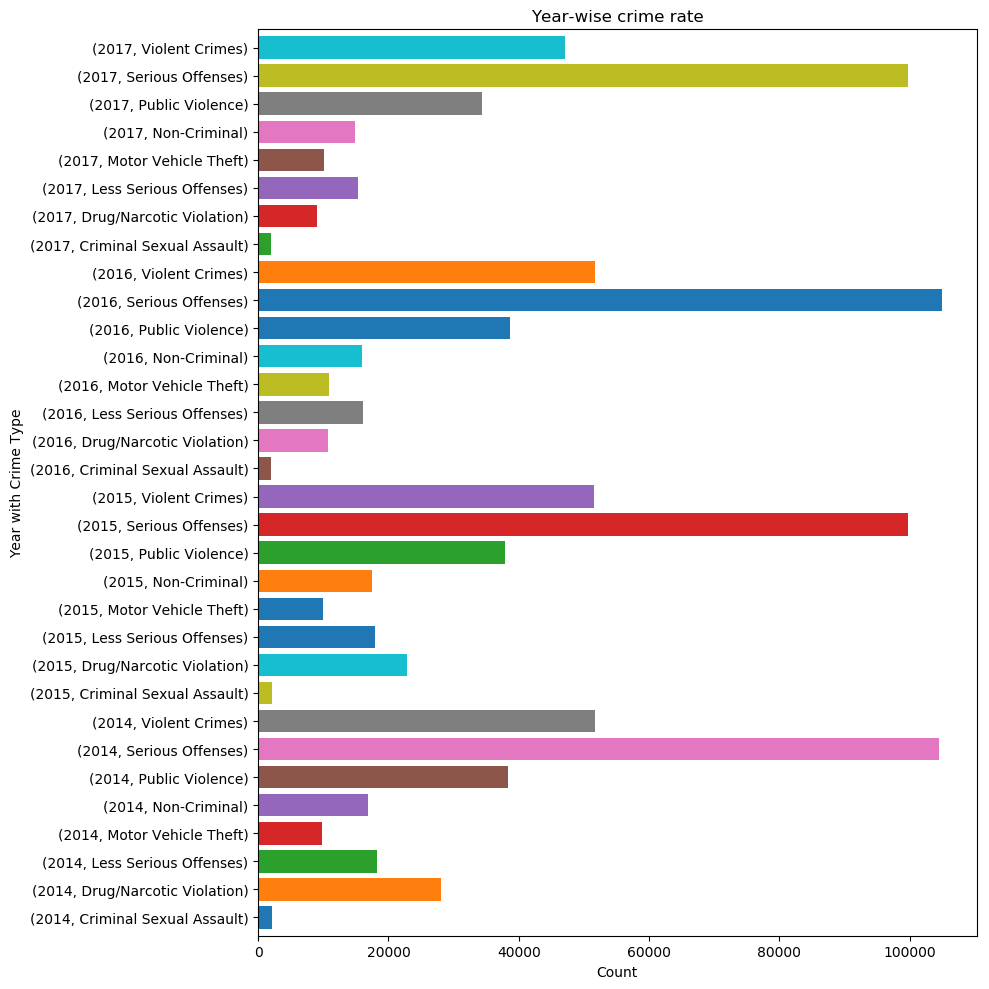

In [31]:
from matplotlib.pyplot import figure

import matplotlib.pyplot as plt

#xlabel='Incident Count'
#ylabel='Year with Crime Category'
figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
   

df['primary_type_categories'].groupby([df.Date1.dt.year,df.primary_type_categories]).agg('count').plot(kind='barh',lw=0.9, width=0.8, align='center')
plt.ylabel('Year with Crime Type')
plt.xlabel('Count')
plt.title('Year-wise crime rate')
plt.tight_layout()
plt.show()

In [32]:
df['month'] = df['Date1'].dt.month_name()

In [33]:
df['year']= df['Date1'].dt.year

In [34]:
df['time']= df['Date1'].dt.time

In [35]:
df['day']= df['Date1'].dt.day

In [36]:
df['hour']= df['Date1'].dt.hour

In [37]:
df['week']= df['Date1'].dt.week

In [38]:
df['month_no'] = df['Date1'].dt.month

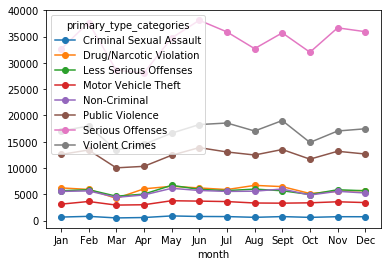

<Figure size 72x72 with 0 Axes>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
df.groupby(['month', 'primary_type_categories',])['arrest'].count().unstack().plot(marker='o')
plt.xticks(np.arange(12),months)
plt.figure(figsize=(1,1))
plt.show()

In [40]:
temp = df.pivot_table(values = 'unique_id', index= 'primary_type_categories',columns = df.Date1.dt.year, aggfunc=np.size)
temp

Date1,2014,2015,2016,2017
primary_type_categories,,,,
Criminal Sexual Assault,2083,2201,2019,2032
Drug/Narcotic Violation,28121,22844,10666,8969
Less Serious Offenses,18174,17979,16152,15371
Motor Vehicle Theft,9795,10031,10893,10052
Non-Criminal,16806,17474,15970,14872
Public Violence,38374,37931,38620,34332
Serious Offenses,104451,99779,105032,99709
Violent Crimes,51644,51526,51648,47070


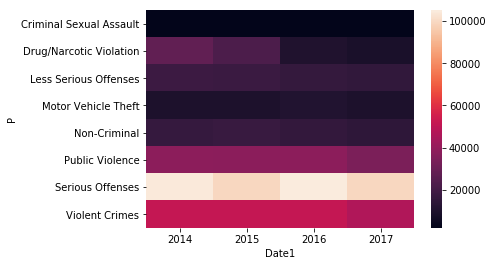

<Figure size 144x72 with 0 Axes>

In [41]:
import seaborn as sns
sns.heatmap(temp)
plt.ylabel('P')
plt.figure(figsize=(2,1))
plt.show()

## Conclusion

The number of serious offenses are more as compared to other crime categories over the years.

# Question 3 - At what locations are most crimes taking place 

Below graphs displays the count of crimes that happens in the specific locations.

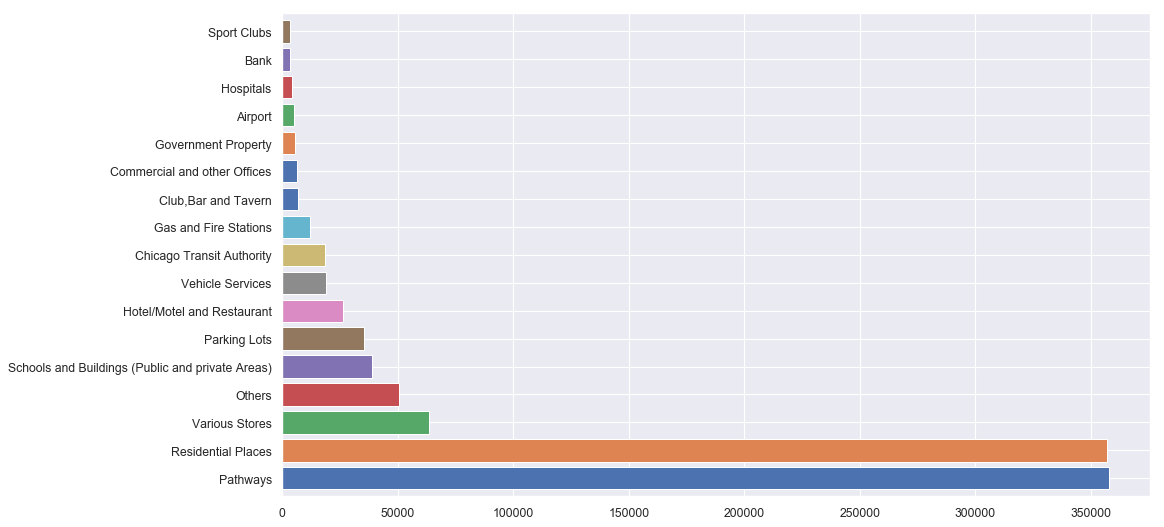

In [42]:
import seaborn as sns                             # provides a high-level interface to draw statistical graphics.
import matplotlib.pyplot as plt                   # Calls all plotting funbctions.
from matplotlib.pyplot import figure
sns.set(style = 'darkgrid')

figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k') # setting formatting
df['loc_categories'].value_counts().plot(kind='barh',lw=0.9, width=0.8, align='center') # defining range and plotting values.
plt.show()

In [43]:
import numpy as np
temp = df.pivot_table(values = 'arrest', index= 'loc_categories',columns = 'primary_type_categories', aggfunc=np.size)
temp

primary_type_categories,Criminal Sexual Assault,Drug/Narcotic Violation,Less Serious Offenses,Motor Vehicle Theft,Non-Criminal,Public Violence,Serious Offenses,Violent Crimes
loc_categories,,,,,,,,
Airport,17,163,453,182,890,861,1878,455
Bank,1,10,2452,3,54,251,717,57
Chicago Transit Authority,248,644,1860,28,153,2299,9864,3213
"Club,Bar and Tavern",75,31,732,10,93,412,3613,1977
Commercial and other Offices,37,89,741,55,524,1247,3193,411
Gas and Fire Stations,18,913,1147,829,393,2696,4794,1361
Government Property,57,296,247,36,396,1230,2306,774
Hospitals,151,210,195,33,331,422,1577,1204
Hotel/Motel and Restaurant,249,244,3389,72,770,3569,14699,3101


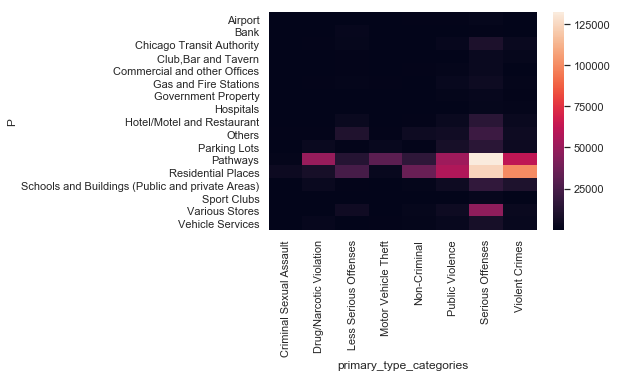

<Figure size 72x72 with 0 Axes>

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(temp)
plt.ylabel('P')
plt.figure(figsize=(1,1))
plt.show()

## Conclusion

The most number of crimes takes place in residencial areas and pathways and the minimum at sports club, hospitals, airports, etc

# Question 4 - No. of arrest over the years

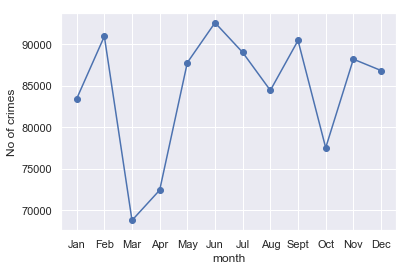

<Figure size 72x72 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt  
import numpy as np
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
df.groupby('month')['arrest'].count().plot(marker='o')
plt.xticks(np.arange(12), months)
plt.ylabel('No of crimes')
plt.figure(figsize=(1,1))
plt.show()

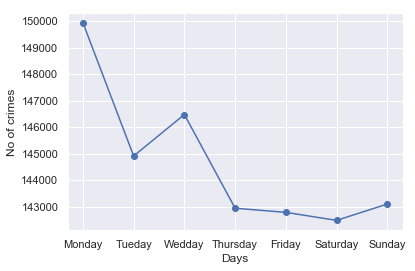

<Figure size 72x72 with 0 Axes>

In [46]:
days=['Monday', 'Tueday', 'Wedday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df.groupby(df.Date1.dt.weekday_name)['arrest'].count().plot(marker='o')
plt.xticks(np.arange(7),days)
plt.ylabel('No of crimes')
plt.xlabel('Days')
plt.figure(figsize=(1,1))
plt.show()


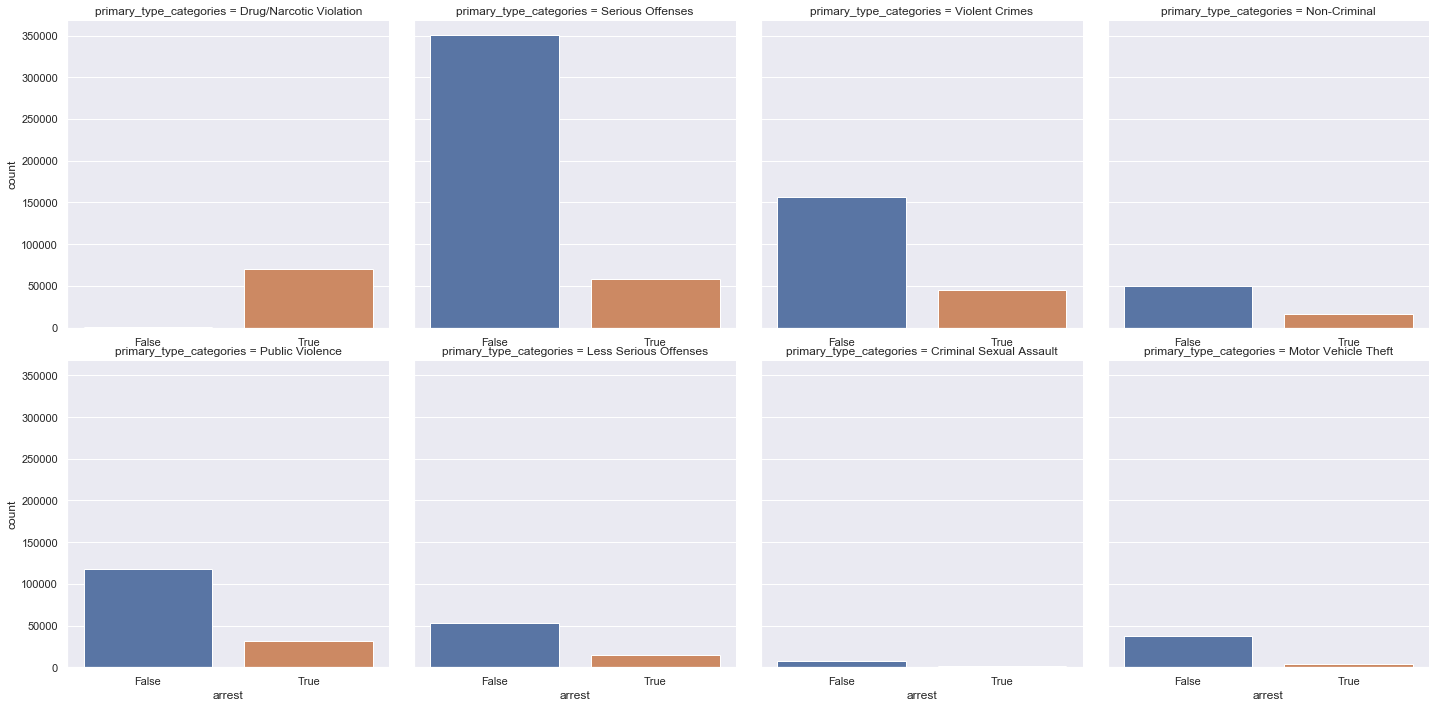

In [47]:
g =sns.catplot("arrest", col="primary_type_categories", col_wrap=4, legend_out=True,
                   data=df, orient='h',
                    kind="count")
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True)

## Conclusion

The number of crime arrests are very low and some cases it is negligible.

# Visualization - Maps

In [48]:
import folium
from folium import IFrame, FeatureGroup, LayerControl, Map, Marker, plugins
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
Chicago_COORDINATES = (41.895140898, -87.624255632)

In [50]:
df.dropna(subset=['ward'], how='all', inplace = True)

In [51]:
#getting rid of decimal in District, Ward and Community Area and turning them into string type.
df[['district', 'ward','community_area']] = df[['district', 'ward','community_area']].astype('int')
df[['district', 'ward','community_area']] = df[['district', 'ward','community_area']].astype('str')
df.head()

,unique_id,primary_type,loc_desc,arrest,beat,district,ward,community_area,latitude,longitude,...,crime_categories,loc_categories,primary_type_categories,month,year,time,day,hour,week,month_no
0,10508593,narcotics,sidewalk,True,1115,11,28,26,41.880658,-87.731212,...,Non-Violence,Pathways,Drug/Narcotic Violation,March,2016,21:00:00,5,21,9,3
1,10508594,theft,apartment,False,833,8,13,65,41.774141,-87.726307,...,Violence,Residential Places,Serious Offenses,March,2016,21:30:00,5,21,9,3
2,10508595,assault,street,False,924,9,12,61,41.811698,-87.675214,...,Violence,Pathways,Serious Offenses,March,2016,15:00:00,5,15,9,3
3,10508597,battery,sidewalk,False,825,8,15,66,41.778661,-87.682273,...,Non-Violence,Pathways,Violent Crimes,March,2016,18:30:00,5,18,9,3
4,10508598,robbery,sidewalk,False,322,3,6,69,41.766961,-87.620152,...,Violence,Pathways,Serious Offenses,March,2016,15:00:00,5,15,9,3


In [52]:
crimedata2016 = df[df['Date1'].dt.year==2016]
crimedata2016.head()

,unique_id,primary_type,loc_desc,arrest,beat,district,ward,community_area,latitude,longitude,...,crime_categories,loc_categories,primary_type_categories,month,year,time,day,hour,week,month_no
0,10508593,narcotics,sidewalk,True,1115,11,28,26,41.880658,-87.731212,...,Non-Violence,Pathways,Drug/Narcotic Violation,March,2016,21:00:00,5,21,9,3
1,10508594,theft,apartment,False,833,8,13,65,41.774141,-87.726307,...,Violence,Residential Places,Serious Offenses,March,2016,21:30:00,5,21,9,3
2,10508595,assault,street,False,924,9,12,61,41.811698,-87.675214,...,Violence,Pathways,Serious Offenses,March,2016,15:00:00,5,15,9,3
3,10508597,battery,sidewalk,False,825,8,15,66,41.778661,-87.682273,...,Non-Violence,Pathways,Violent Crimes,March,2016,18:30:00,5,18,9,3
4,10508598,robbery,sidewalk,False,322,3,6,69,41.766961,-87.620152,...,Violence,Pathways,Serious Offenses,March,2016,15:00:00,5,15,9,3


In [53]:
#definition of the boundaries in the map
district_geo = r'/Users/sanket/Downloads/Boundaries - Police Districts (current).geojson'

district_data = pd.DataFrame(crimedata2016['district'].value_counts().astype(float))
district_data.to_json('District_Map.json')
district_data = district_data.reset_index()
district_data.columns = ['district', 'Crime_Count']

#creation of the choropleth
map2 = folium.Map(location=Chicago_COORDINATES, zoom_start=11)
map2.choropleth(geo_data = district_geo,  
                data = district_data,
                columns = ['district', 'Crime_Count'],
                key_on = "feature.properties.dist_num",
                fill_color = 'YlOrRd', 
                fill_opacity = 0.7, 
                line_opacity = 0.2,
                threshold_scale=[0, 4000, 8000, 12000, 16000, 20000],
                legend_name = 'Number of incidents per district 2016')

/anaconda3/lib/python3.7/site-packages/folium/folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [54]:
map2

In [55]:
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="cartodbpositron")

In [56]:
locations = df.groupby('community_area').first()

In [57]:
new_locations = locations.loc[:, ['latitude', 'longitude', 'primary_type','arrest','loc_desc']]


In [58]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Crime Type : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.iloc[i][-3],
                               new_locations.iloc[i][-2],
                               new_locations.iloc[i][-1]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)

In [59]:
chicago_map

# Visualization - Top 6 crimes

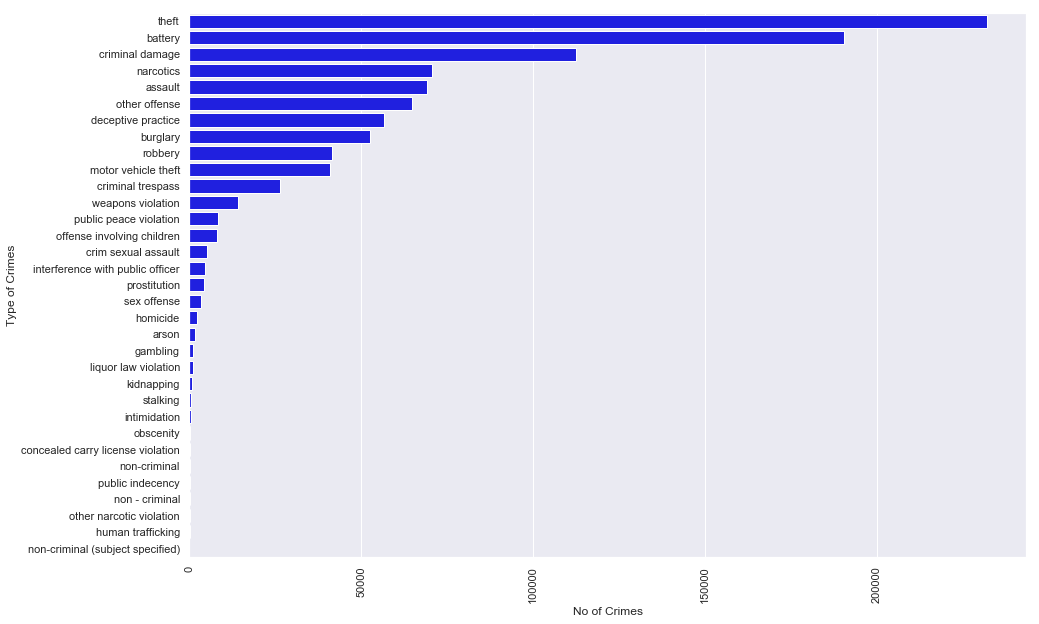

In [60]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(y='primary_type',data=df,order=df['primary_type'].value_counts().index, color=('BLUE'))
plt.xticks(rotation='vertical')
plt.xlabel('No of Crimes')
plt.ylabel('Type of Crimes')
plt.show()

Here we can see the top 6 crimes being commited in chicago is: THEFT, BATTERY, CRIMINAL DAMAGE, NARCOTICS, BURGLARY and ASSAULT
By viewing when the crime is committed within the 24-hours day, we can better understand the behaviour and characteristics of each crime.

In [61]:
df_crime=df[(df['primary_type']=='theft')|(df['primary_type']=='battery')|
                 (df['primary_type']=='criminal damage')|(df['primary_type']=='narcotics')|
                 (df['primary_type']=='burglary')|(df['primary_type']=='assault')]

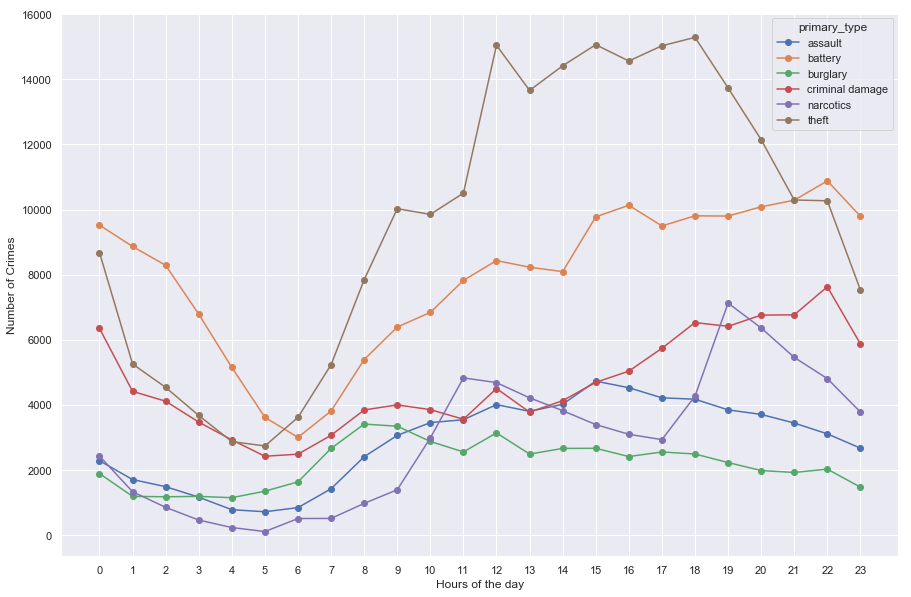

<Figure size 72x72 with 0 Axes>

In [62]:
df_crime.groupby([df_crime['Date1'].dt.hour,'primary_type',])['unique_id'].count().unstack().plot(marker='o')
plt.ylabel('Number of Crimes')
plt.xlabel('Hours of the day')
plt.xticks(np.arange(24))
plt.figure(figsize=(1,1))
plt.show()

When looking at the time-series graph, you'll notice several trends in crime committed.

Most crimes will start decline at 1 AM
Lowest number of crime commited is between 5 AM and 6AM
Highest number of theft reported is in the afternoon. "Stealing in broad daylight"
Narcotics is shown to peak twice, once around the afternoon and again between 7 PM and 9 PM

# Models

In [63]:
df["primary_type_categories"] = df["primary_type_categories"].astype('category')
df["loc_categories"] = df["loc_categories"].astype('category')
df["crime_categories"] = df["crime_categories"].astype('category')

df["primary_type_categories_cat"] = df["primary_type_categories"].cat.codes
df["loc_categories_cat"] = df["loc_categories"].cat.codes
df["crime_categories_cat"] = df["crime_categories"].cat.codes

In [64]:
df[['district', 'ward','community_area']] = df[['district', 'ward','community_area']].astype('int')

In [65]:
df["year"] = df["year"].astype('category')
df["year_cat"] = df["year"].cat.codes

df.dtypes

unique_id                               int64
primary_type                           object
loc_desc                               object
arrest                                   bool
beat                                    int64
district                                int64
ward                                    int64
community_area                          int64
latitude                              float64
longitude                             float64
location                               object
Date1                          datetime64[ns]
new_date                               object
new_time                               object
crime_categories                     category
loc_categories                       category
primary_type_categories              category
month                                  object
year                                 category
time                                   object
day                                     int64
hour                              

In [66]:
x=df.iloc[:,[20,23,22,21,24,25,27]].values
print(x)

[[ 5  3  9 ...  1 11  2]
 [ 5  3  9 ...  6 12  2]
 [ 5  3  9 ...  6 11  2]
 ...
 [28 11 48 ...  6  9  3]
 [28 11 48 ...  2 11  3]
 [28 11 48 ...  2 11  3]]


In [67]:
y=df.iloc[:,26].values
print(y)

[0 1 1 ... 1 0 0]


In [68]:
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=80)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [71]:
knn.score(X_test,y_test)

0.8877658340040391

In [72]:
knn.score(X_train,y_train)

0.9169143751573895

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [74]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=500,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=300,
            splitter='best')

In [75]:
print(dtree.feature_importances_)

[0.02767136 0.00599379 0.01259932 0.01819527 0.87886757 0.04758425
 0.00908843]


In [76]:
y_pred=dtree.predict(X_test)

In [77]:
dtree.score(X_test,y_test)

0.9320916636628926

In [78]:
dtree.score(X_train,y_train)


0.9677826715977939

## Feature Importance part 1

In [79]:
treefeatures=dtree.feature_importances_
indices1 = np.argsort(treefeatures)
treefeatures

array([0.02767136, 0.00599379, 0.01259932, 0.01819527, 0.87886757,
       0.04758425, 0.00908843])

In [80]:
df2 = df.iloc[:,[4,5,6,7,8,9,11,12]]

In [81]:
features=df2.columns
print(features)

Index(['beat', 'district', 'ward', 'community_area', 'latitude', 'longitude',
       'Date1', 'new_date'],
      dtype='object')


Text(0.5,0,'Relative Importance')

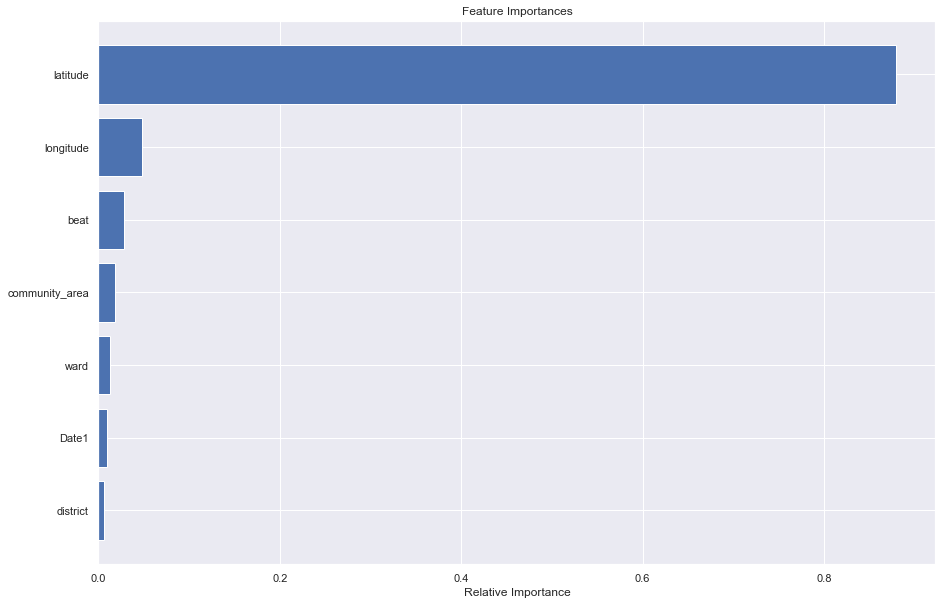

In [82]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices1)), treefeatures[indices1], color='b', align='center')
plt.yticks(range(len(indices1)), features[indices1])
plt.xlabel('Relative Importance')

## Feature Importance part 2

In [83]:
treefeatures=dtree.feature_importances_
indices = np.argsort(treefeatures)
treefeatures

array([0.02767136, 0.00599379, 0.01259932, 0.01819527, 0.87886757,
       0.04758425, 0.00908843])

In [84]:
df1 = df.iloc[:,[20,21,22,23,4,5,6]]

In [85]:
features=df1.columns
print(features)

Index(['day', 'hour', 'week', 'month_no', 'beat', 'district', 'ward'], dtype='object')


In [86]:
print(range(len(indices)))
print(indices)
print(treefeatures[indices])

print(features[indices])

range(0, 7)
[1 6 2 3 0 5 4]
[0.00599379 0.00908843 0.01259932 0.01819527 0.02767136 0.04758425
 0.87886757]
Index(['hour', 'ward', 'week', 'month_no', 'day', 'district', 'beat'], dtype='object')


Text(0.5,0,'Relative Importance')

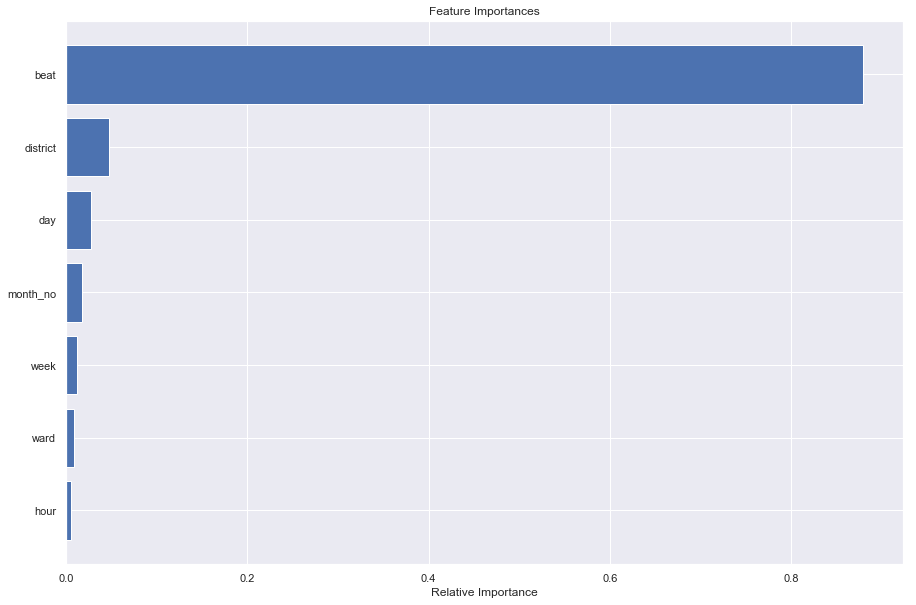

In [87]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), treefeatures[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [89]:
y_pred=rfc.predict(X_test)

In [90]:
rfc.score(X_test,y_test)

0.9398883089821897

In [91]:
rfc.score(X_train,y_train)

0.9677789683147099

# Conclusion

According to our analysis
1. The non-violence crimes are decreasing over the years but the same is not the case for violence crimes
2. Serious Offenses crimes are more as compared to other crimes
3. Most crimes takes place at Residential and Pathways
4. Most theft crimes takes place at 6 pm in the evening and less at 5 in the morning
5. The number of arrest are very less over the years

# References

1. https://www.kaggle.com/currie32/crimes-in-chicago
2. https://scikit-learn.org/stable/
3. http://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html
4. http://python-visualization.github.io/folium/docs-v0.5.0/modules.html